# Analysis of Superstore Data
The goal of this analysis is to identify areas that can be improved upon to enhance profitability. 

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import os

In [117]:
orders = pd.read_excel('Sample - Superstore.xls')

In [118]:
orders.shape

(9994, 21)

In [119]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [120]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [121]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [122]:
orders.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [184]:
for col in orders:
    print(orders[col].unique())

['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']
['2016-11-08T00:00:00.000000000' '2016-06-12T00:00:00.000000000'
 '2015-10-11T00:00:00.000000000' ... '2016-06-03T00:00:00.000000000'
 '2015-04-12T00:00:00.000000000' '2014-01-21T00:00:00.000000000']
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-15250' 'PA-19060' 'CV-12805' 'CL-12565' 'RC-19960'
 'DK-13090' 'GG-14650' 'SC-20725' 'AD-10180' 'PF-19165' 'TS-21610'
 'LS-16975' 'DW-13585

In [123]:
#dropping unnecessary columns 
orders = orders.drop(columns=["Row ID","Ship Date", "Ship Mode","Country","Postal Code"], axis=1) 

In [125]:
orders.head()

,Order ID,Order Date,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [126]:
orders.isnull().sum() #no null values

Order ID         0
Order Date       0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [130]:
orders.duplicated().sum() #duplicated values

1

In [135]:
orders = orders.drop_duplicates()

In [136]:
orders.duplicated().sum()

0

In [137]:
orders["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [138]:
orders["Segment"].unique() 

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [139]:
orders["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [140]:
orders["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [181]:
#Sub-Categories with reference to Categories
for i in orders['Category'].unique():
    print(i, orders.loc[orders['Category'] == i, 'Sub-Category'].unique())

Furniture ['Bookcases' 'Chairs' 'Tables' 'Furnishings']
Office Supplies ['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']
Technology ['Phones' 'Accessories' 'Machines' 'Copiers']


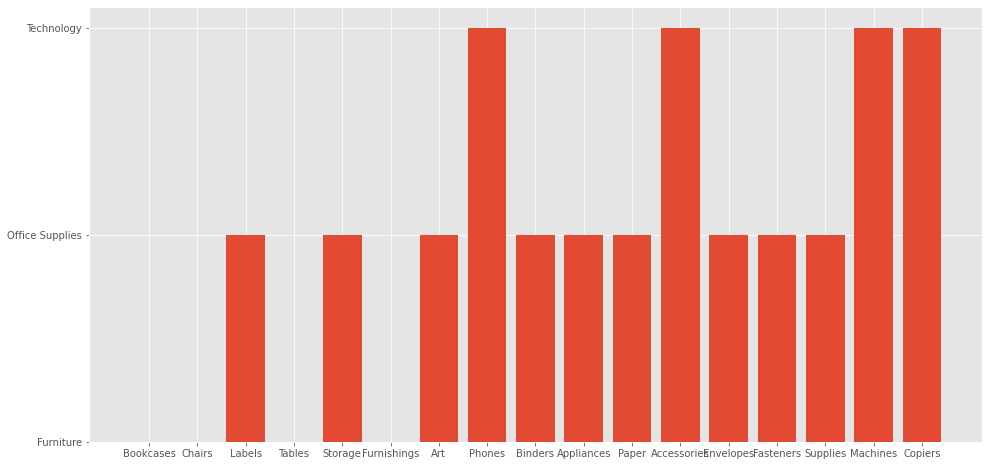

In [142]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=orders)
plt.show()

## Category Analysis

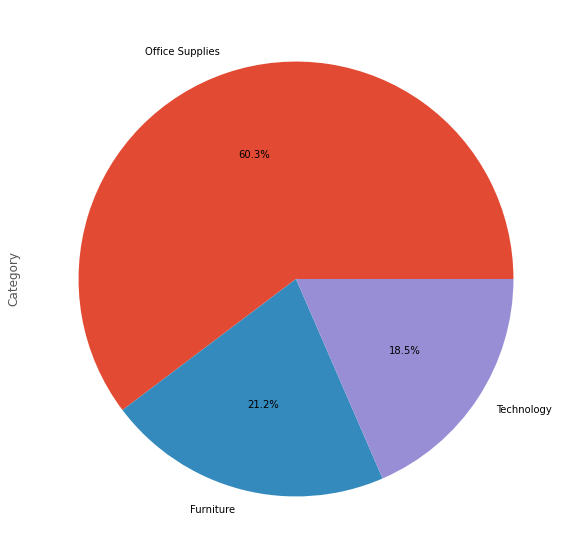

In [49]:
plt.figure(figsize=(12,10))
orders['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
#the store has a lot of office supplies

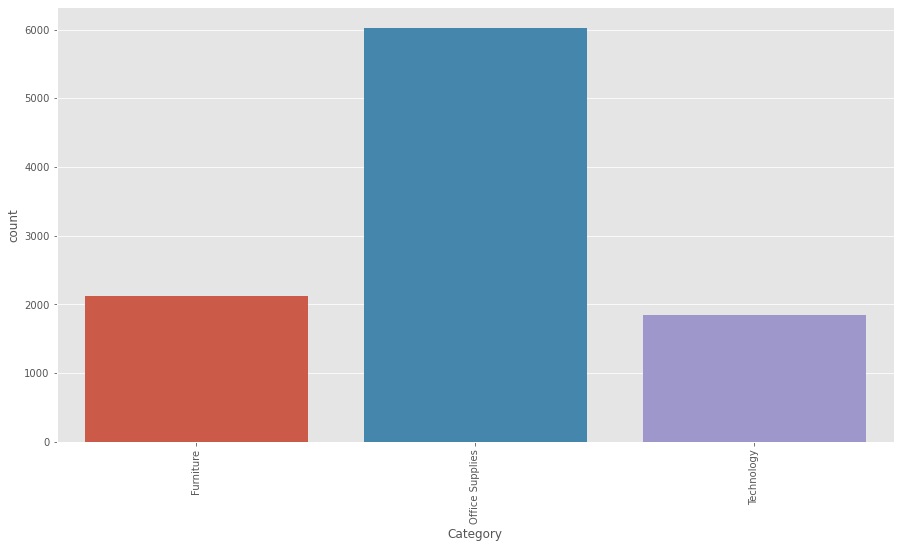

In [144]:
plt.figure(figsize=(15,8))
sns.countplot(x=orders['Category'])
plt.xticks(rotation=90)
plt.show()

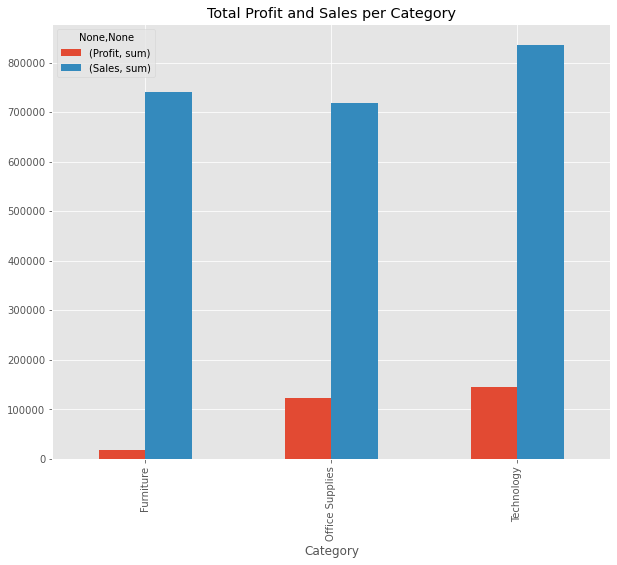

In [145]:
orders.groupby('Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Category')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()
#we can see that the category technology has the most sales as well as profit

## Sub-Category Analysis

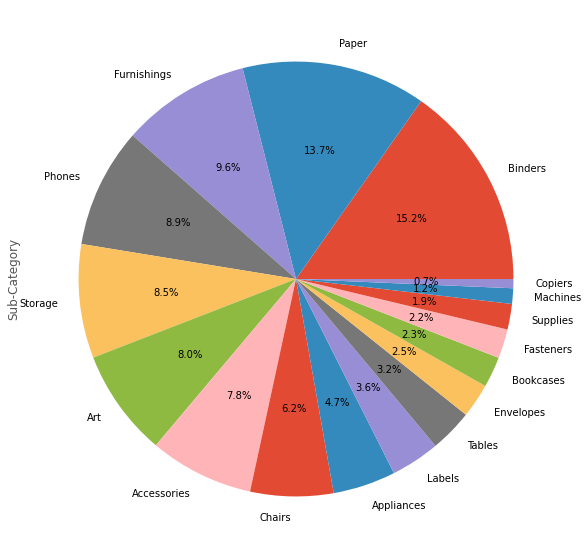

In [146]:
plt.figure(figsize=(12,10))
orders['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
#The amount of orders for Binders are the most

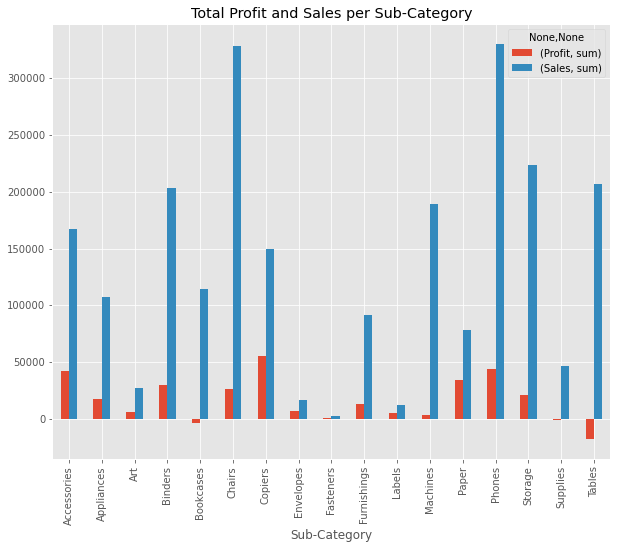

In [147]:
orders.groupby('Sub-Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()
#although the sales of tables and bookcases are comparitively more but we can see that we are dealing with overall negative value of profit here
#the most profitable is copiers although the sales are not that high
#whereas for accessories and phones we can see higher sales along with high profit

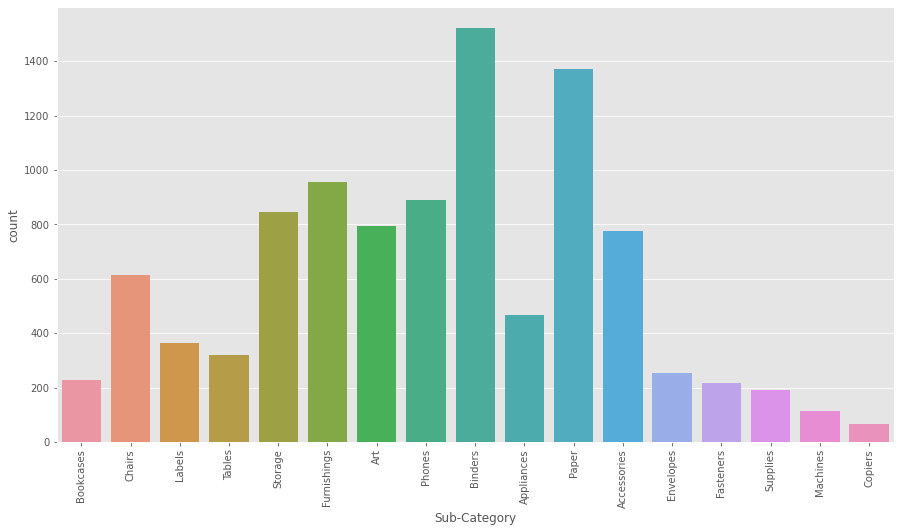

In [148]:
plt.figure(figsize=(15,8))
sns.countplot(x=orders['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

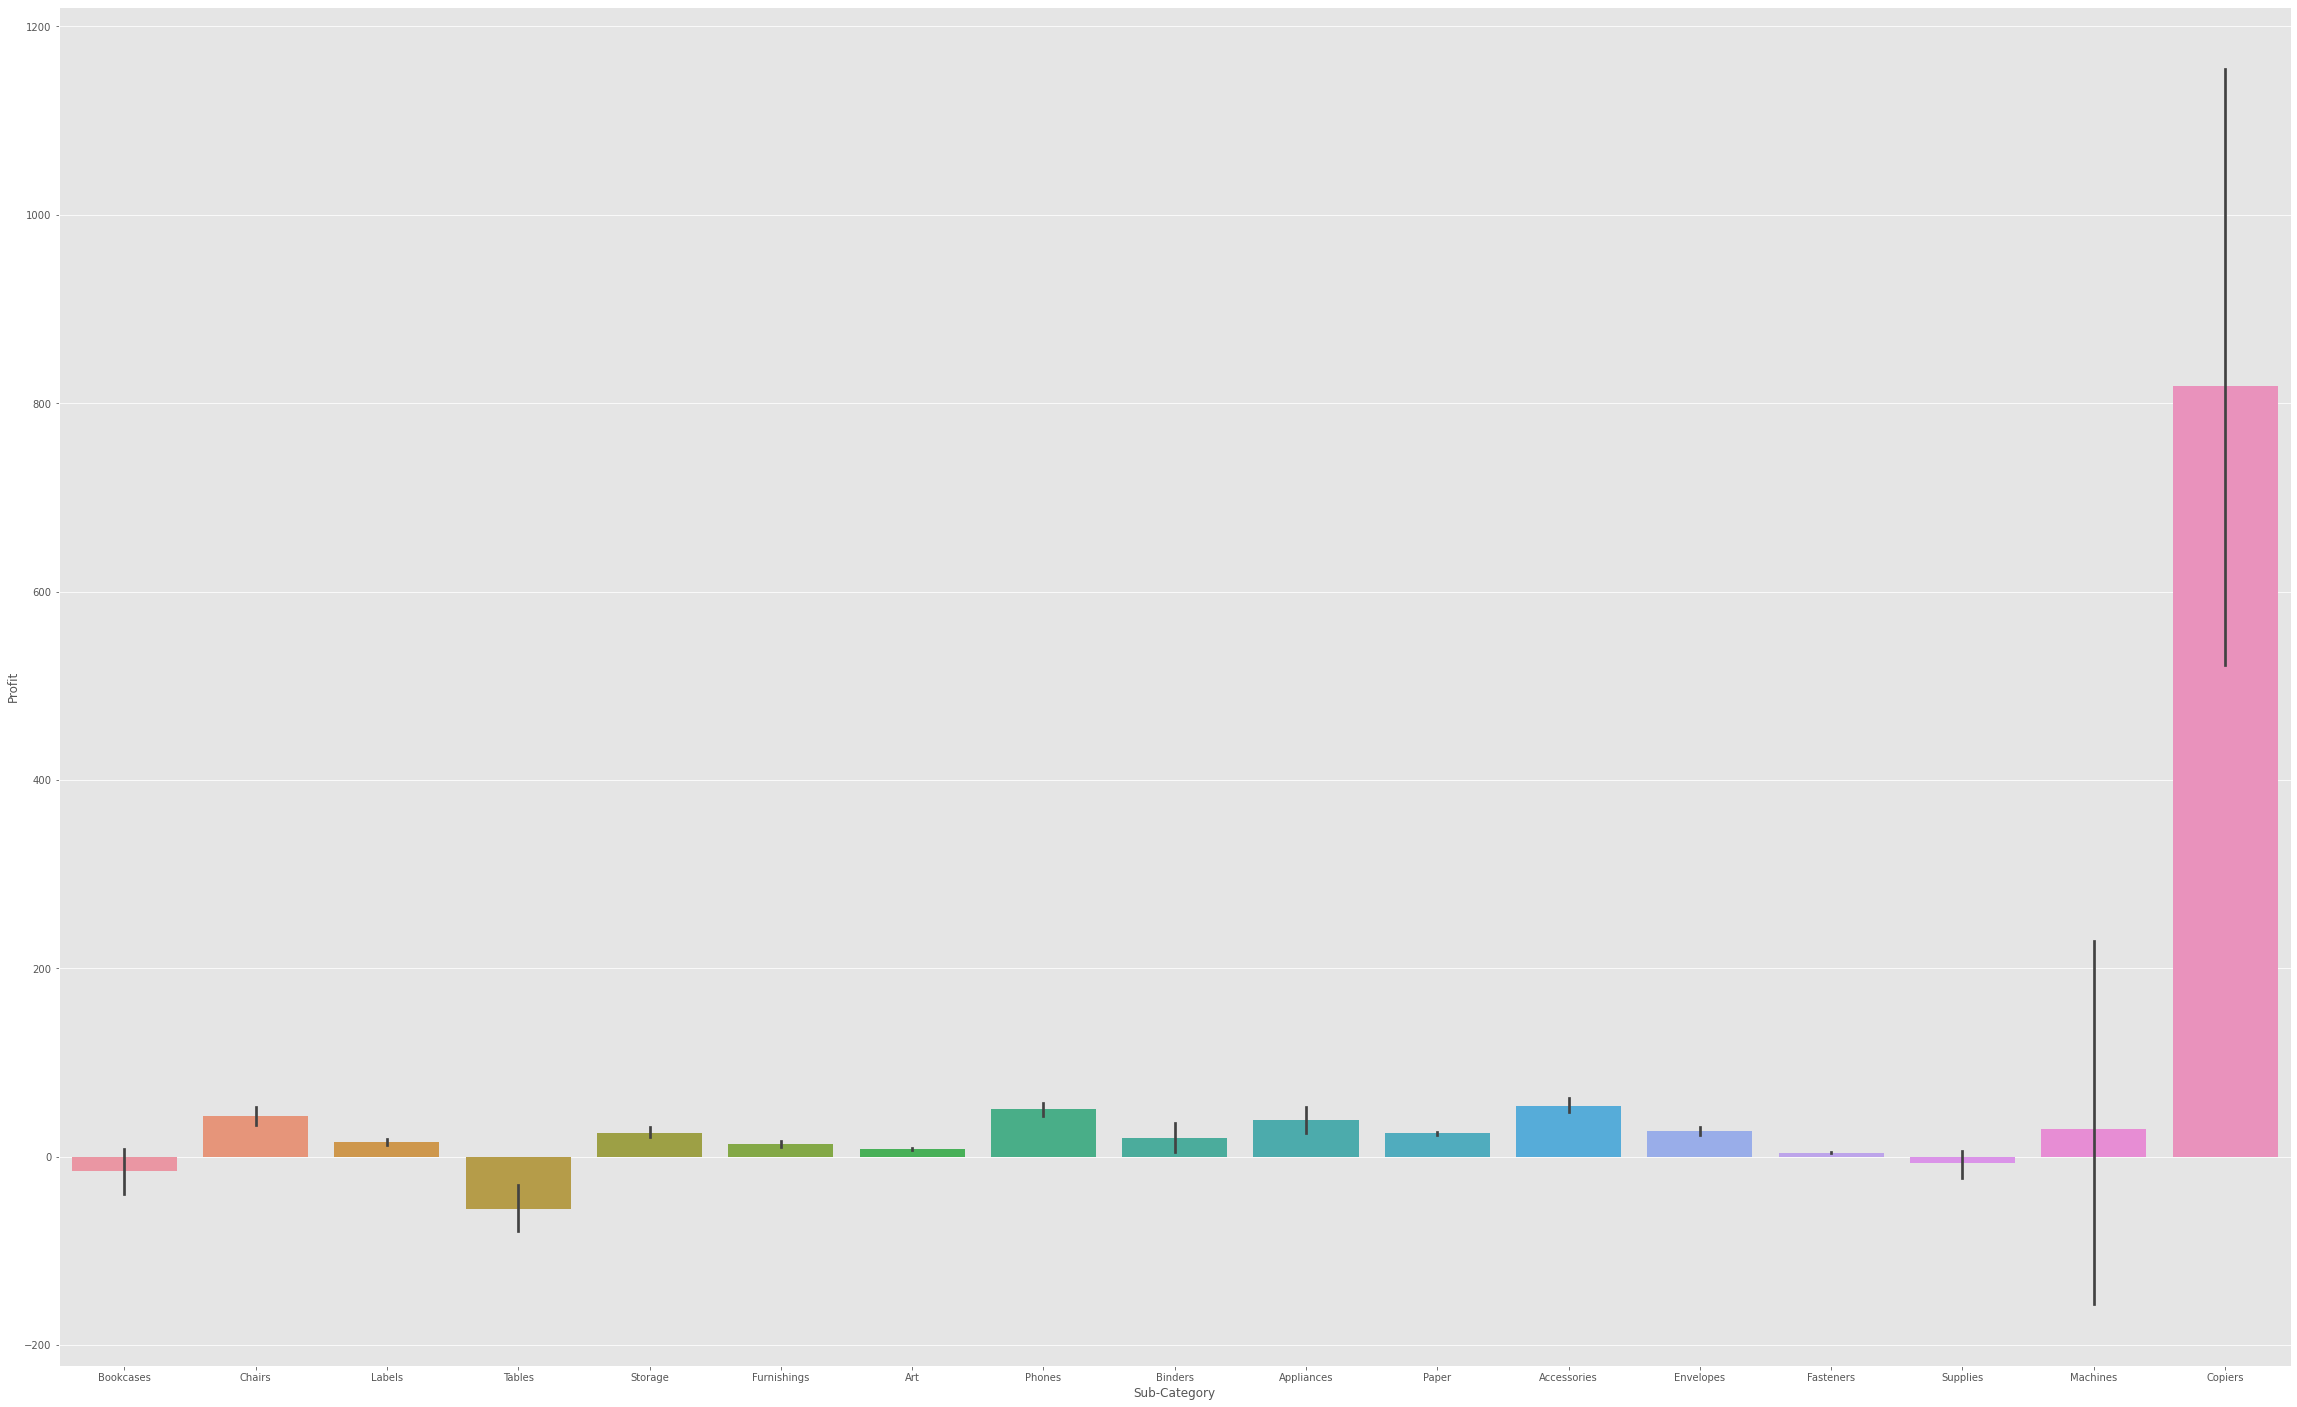

In [149]:
plt.figure(figsize=(40,25))
sns.barplot(x=orders['Sub-Category'], y=orders['Profit'])
#Again using this barplot we can see observe the above conclusions

## Segment Analysis

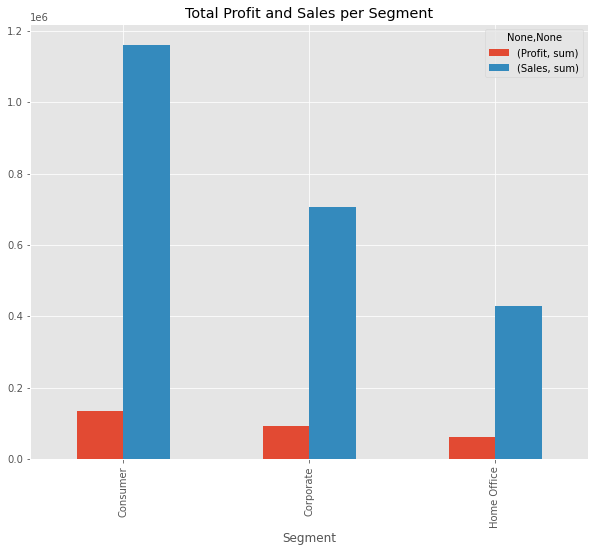

In [150]:
orders.groupby('Segment')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Segment')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()
#therefore we can deduce that both the sales and profit for the consumer segment is higher

In [182]:
#We cannot deduce much from Segments as the subcategories are spread across more than one segment
#Sub-Categories with reference to Segment
for i in orders['Segment'].unique():
    print(i,orders.loc[orders['Segment'] == i, 'Sub-Category'].unique())
#As we can see Copiers (which is the most profitable as shown above) belongs to all 3 segments

Consumer ['Bookcases' 'Chairs' 'Tables' 'Storage' 'Furnishings' 'Art' 'Phones'
 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes' 'Labels'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Corporate ['Labels' 'Art' 'Appliances' 'Phones' 'Furnishings' 'Storage'
 'Accessories' 'Binders' 'Fasteners' 'Envelopes' 'Paper' 'Chairs'
 'Bookcases' 'Machines' 'Tables' 'Supplies' 'Copiers']
Home Office ['Appliances' 'Binders' 'Paper' 'Envelopes' 'Bookcases' 'Chairs' 'Phones'
 'Storage' 'Furnishings' 'Accessories' 'Art' 'Tables' 'Fasteners' 'Labels'
 'Machines' 'Supplies' 'Copiers']


## State Analysis

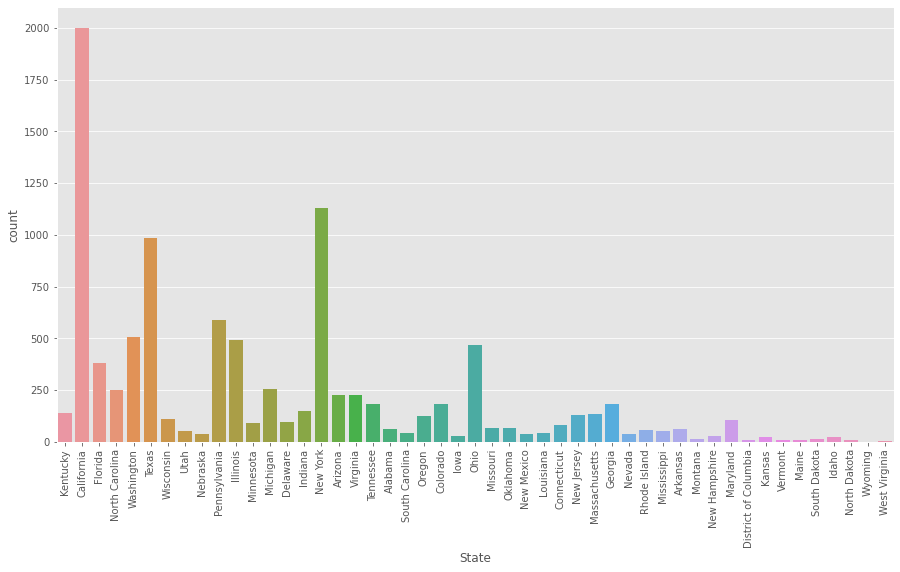

In [152]:
plt.figure(figsize=(15,8))
sns.countplot(x=orders['State'])
plt.xticks(rotation=90)
plt.show()
#California and New York have significant number of orders compared to others

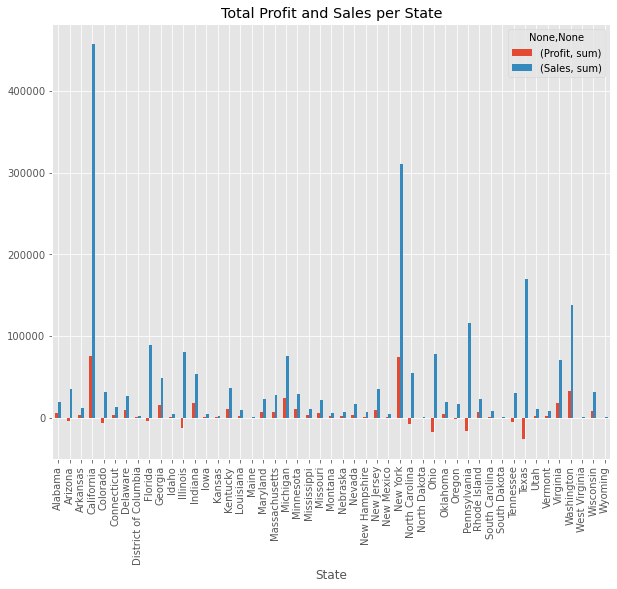

In [76]:
orders.groupby('State')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per State')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()
#We can see that California and New York have higher sales and approximately the same amount of profit whereas texas has significant overall loss

## City Analysis

In [153]:
orders.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
#as for the cities we can see that New York City has the highest amount of sales followed by Los Angeles

,City,Sales
329,New York City,256368.161
266,Los Angeles,175851.341
452,Seattle,119540.742
438,San Francisco,112669.092
374,Philadelphia,109077.013
...,...,...
354,Ormond Beach,2.808
370,Pensacola,2.214
221,Jupiter,2.064
140,Elyria,1.824


In [154]:
orders.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
#we can see the same for profit although Philadelphia seems to have incurred the highest amount of loss

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
...,...,...
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485


 ## Region Analysis

<AxesSubplot:xlabel='Region', ylabel='count'>

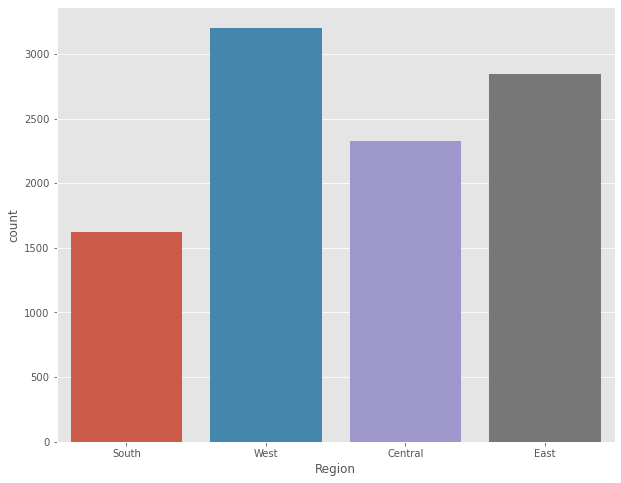

In [156]:
sns.countplot(x=orders['Region'])
#highest amount of orders are from the west

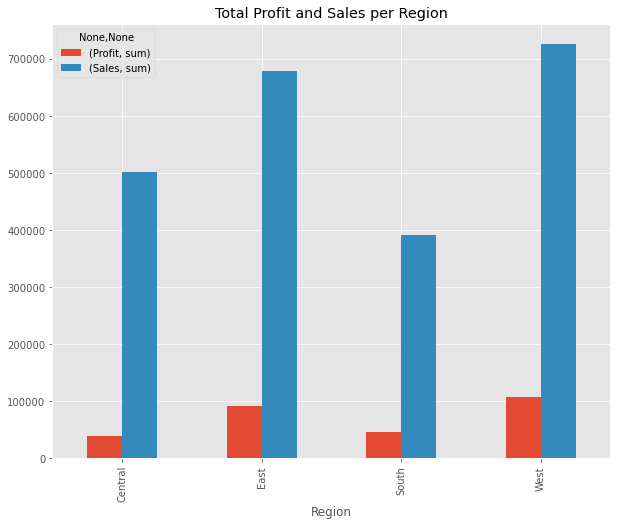

In [185]:
orders.groupby('Region')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Region')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()
#West and East have better Sales and Profit

## Discount Vs Profit

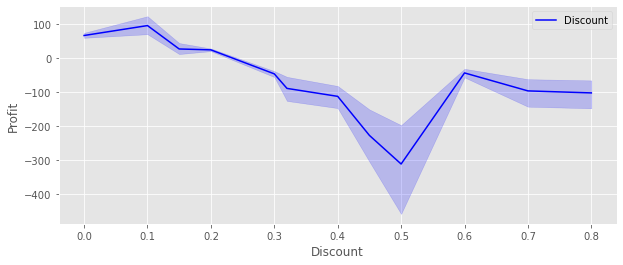

In [158]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount', y='Profit', data=orders, color='b', label='Discount')
plt.legend()
#we can see that upto 0.5 the profit declines with a little bit rise at 0.6 
#so the highest amount of profit is made when no discount is given
#hence the negative correlation between discount and profit can be seen

## Discount Vs Sales

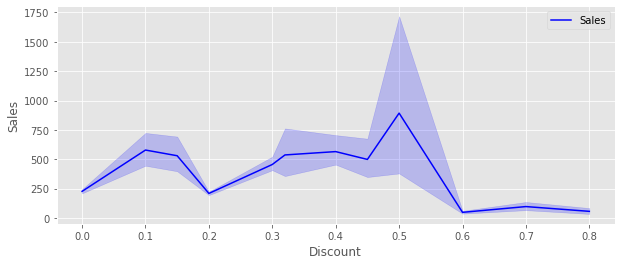

In [161]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount', y='Sales', data=orders, color='b', label='Sales')
plt.legend()
#although here we can observe an almost flipped graph
#deducing that sales increases due to discount

## Distribution of Orders Over Time

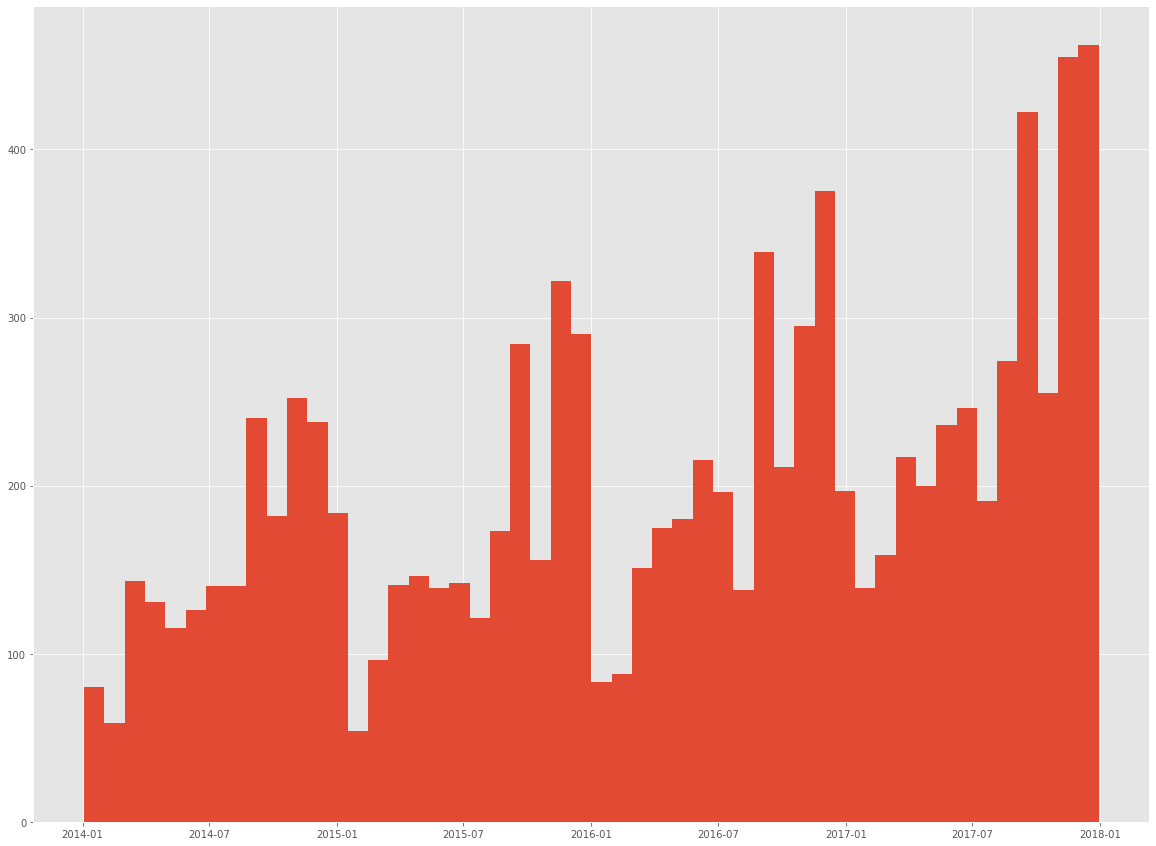

In [165]:
orders['Order Date'].hist(bins=50, figsize=(20,15))
plt.show()

## Histogram of Data

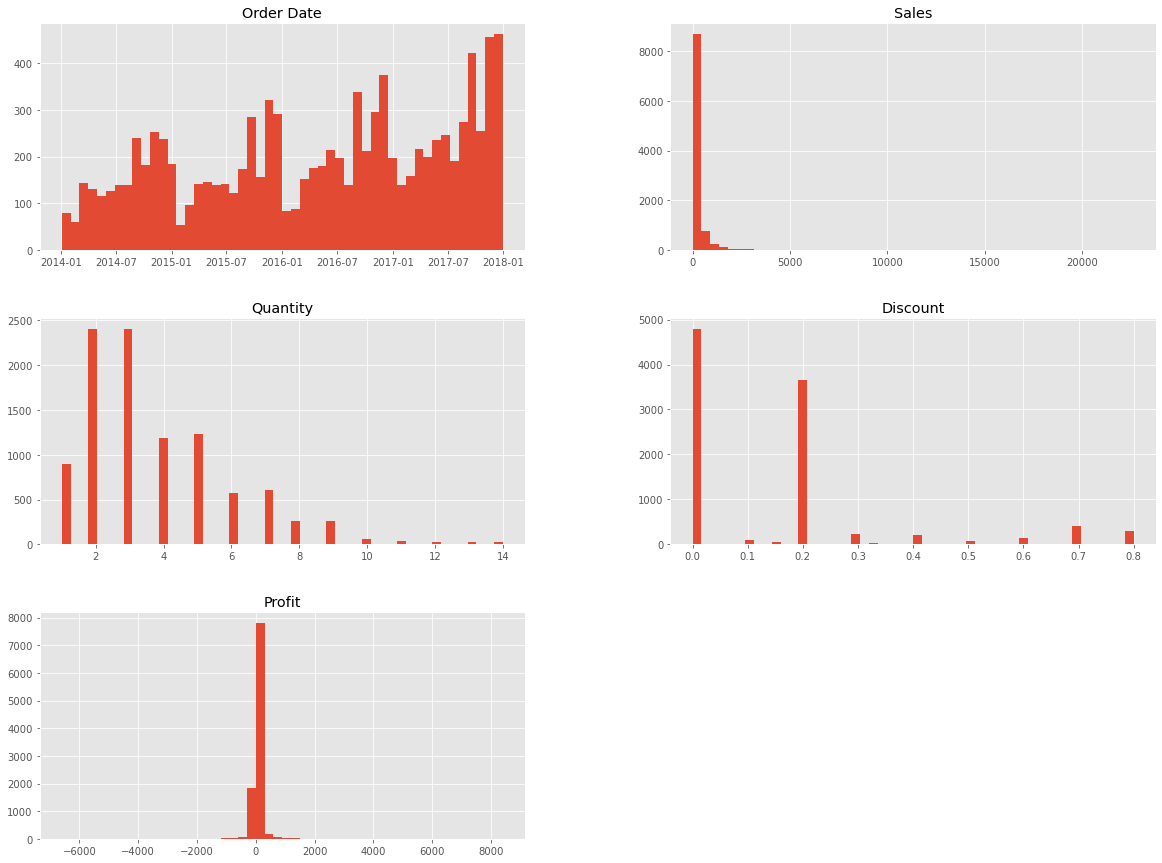

In [183]:
orders.hist(bins=50, figsize=(20,15))
plt.show()

## Correlation among the Columns


In [166]:
orders.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200808,-0.028197,0.479067
Quantity,0.200808,1.000000,0.008680,0.066241
Discount,-0.028197,0.008680,1.000000,-0.219481
Profit,0.479067,0.066241,-0.219481,1.000000


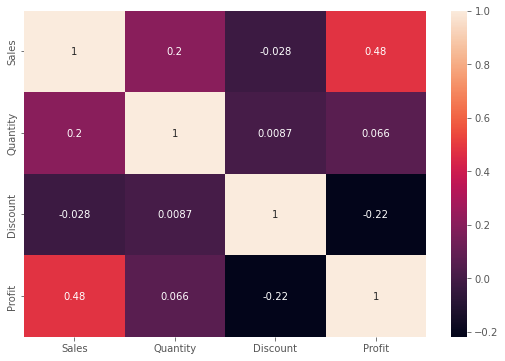

In [179]:
fig,axes=plt.subplots(1,1,figsize=(9,6))
sns.heatmap(orders.corr(), annot= True)
plt.show()
#Profit and Discount are negatively correlated

In [178]:
group = pd.DataFrame(orders.groupby(['Category','Sub-Category'])[['Quantity','Discount','Sales','Profit']].sum().reset_index())
group

,Category,Sub-Category,Quantity,Discount,Sales,Profit
0,Furniture,Bookcases,868,48.14,114879.9963,-3472.5560
1,Furniture,Chairs,2354,104.70,328167.7310,26602.2251
2,Furniture,Furnishings,3563,132.40,91705.1640,13059.1436
3,Furniture,Tables,1241,83.35,206965.5320,-17725.4811
4,Office Supplies,Appliances,1729,77.60,107532.1610,18138.0054
5,Office Supplies,Art,3000,59.60,27118.7920,6527.7870
6,Office Supplies,Binders,5974,567.00,203412.7330,30221.7633
7,Office Supplies,Envelopes,906,20.40,16476.4020,6964.1767
8,Office Supplies,Fasteners,914,17.80,3024.2800,949.5182
9,Office Supplies,Labels,1400,25.00,12486.3120,5546.2540


In [177]:
group1 = pd.DataFrame(orders.groupby(['State', 'City', 'Segment', 'Region'])[['Quantity','Discount','Sales','Profit']].sum().reset_index())
group1

,State,City,Segment,Region,Quantity,Discount,Sales,Profit
0,Alabama,Auburn,Consumer,South,14,0.0,1763.070,451.5167
1,Alabama,Auburn,Home Office,South,2,0.0,3.760,1.0904
2,Alabama,Decatur,Consumer,South,14,0.0,435.790,77.4454
3,Alabama,Decatur,Corporate,South,38,0.0,2939.030,922.6427
4,Alabama,Florence,Consumer,South,23,0.0,1992.370,246.2187
...,...,...,...,...,...,...,...,...
1170,Wisconsin,Superior,Home Office,Central,37,0.0,1299.730,514.0822
1171,Wisconsin,Waukesha,Consumer,Central,5,0.0,54.500,14.1700
1172,Wisconsin,Wausau,Consumer,Central,14,0.0,317.480,90.4306
1173,Wisconsin,West Allis,Corporate,Central,5,0.0,250.480,28.3708


## Conclusion

- The Category Technology is the most profitable and has the most sales whereas the profit in Furniture Category seems to be lacking.
- The most profitable among the Sub-Category is Copiers although Sales are comparitively not that high whereas for accessories and phones (Technology Category) we can see higher sales along with high profit.
- Also, the sales of tables and bookcases are comparitively more but we can see that we are dealing with overall loss.
- Consumer segment has the highest profit and sales although we cannot deduce much from Segments as the subcategories are spread across more than one segment.
- As for States, California and New York have higher sales and approximately the same amount of profit whereas Texas and Ohio has significant overall loss.
- For Cities, New York City has the highest amount of sales and overall profit followed by Los Angeles (a major reason is their higher population). Philadelphia seems to have incurred the highest amount of overall loss.
- The Region West and East have better Sales and Profit.
- Discount and Profit have a negative Correlation.